Test and debug functions from spikingDataUtilities

In [1]:
import numpy as np
import spikingDataUtilities as su
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [14]:
# test restrict

# first column of samples is assumed to be time stamps at which all other columns are evaluated
samples = np.array([[1.1,5],[3,8],[4,-1.5],[7,2]])
# every row of intervals is an interval, sample time stamps must fall in at least one interval
intervals = [[1,3.2],[6,8]]
su.restrict(samples,intervals,s_ind=True)

(array([[1.1, 5. ],
        [3. , 8. ],
        [7. , 2. ]]),
 array([ True,  True, False,  True]))

In [4]:
# test consolidateIntervals
intervals = [[1,3.2],[6,8],[2,4],[9,11],[10,11],[11.1,12.1],[11.6,11.8]]
su.consolidateIntervals(intervals)

array([[ 1. ,  4. ],
       [ 6. ,  8. ],
       [ 9. , 11. ],
       [11.1, 12.1]])

In [23]:
# test intersectIntervals
intervals1 = [[1,4],[9,11],[5,5.5],[6,8],[11.1,11.8],[12,12.5]]
intervals2 = [[2,5],[5.5,5.8],[6,7],[8.5,11.5],[14,16]]
intervals3 = [[2,3],[5,7.5],[8.1,11]]
intervals4 = [[2,12],[15,17.5]]
su.intersectIntervals((intervals1,intervals2,intervals3,intervals4))

array([[ 2.,  3.],
       [ 6.,  7.],
       [ 9., 11.]])

In [2]:
# load MATLAB data
data = su.loadMATData('../Data/session1.mat')

In [7]:
su.firingRate(np.array([[1,2,3,]]).T)

array([[ 1.025, 20.   ],
       [ 1.075,  0.   ],
       [ 1.125,  0.   ],
       [ 1.175,  0.   ],
       [ 1.225,  0.   ],
       [ 1.275,  0.   ],
       [ 1.325,  0.   ],
       [ 1.375,  0.   ],
       [ 1.425,  0.   ],
       [ 1.475,  0.   ],
       [ 1.525,  0.   ],
       [ 1.575,  0.   ],
       [ 1.625,  0.   ],
       [ 1.675,  0.   ],
       [ 1.725,  0.   ],
       [ 1.775,  0.   ],
       [ 1.825,  0.   ],
       [ 1.875,  0.   ],
       [ 1.925,  0.   ],
       [ 1.975, 20.   ],
       [ 2.025,  0.   ],
       [ 2.075,  0.   ],
       [ 2.125,  0.   ],
       [ 2.175,  0.   ],
       [ 2.225,  0.   ],
       [ 2.275,  0.   ],
       [ 2.325,  0.   ],
       [ 2.375,  0.   ],
       [ 2.425,  0.   ],
       [ 2.475,  0.   ],
       [ 2.525,  0.   ],
       [ 2.575,  0.   ],
       [ 2.625,  0.   ],
       [ 2.675,  0.   ],
       [ 2.725,  0.   ],
       [ 2.775,  0.   ],
       [ 2.825,  0.   ],
       [ 2.875,  0.   ],
       [ 2.925,  0.   ],
       [ 2.975, 20.   ]])

In [ ]:
# test firingRate
spikes = data['spikes_hpc']
# population firing rate
y1 = su.firingRate(spikes[:,0],0,30)
y2 = su.firingRate(spikes[:,0],0,30,smooth=2.5)

plt.plot(y1[:,0],y1[:,1])
plt.plot(y1[:,0],y2[:,1]);

In [9]:
ripple_intervals = data['ripples'] + [-0.5,0.5]
spikes = [su.restrict(data[f][:,0],ripple_intervals) for f in ['spikes_hpc','spikes_nr','spikes_pfc']]

KeyboardInterrupt: 

In [11]:
firing_rates = [su.firingRate(s,smooth=2.5) for s in spikes]

KeyboardInterrupt: 

(0.0, 0.7)

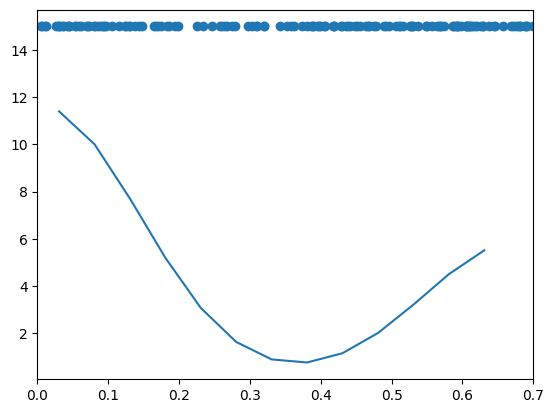

In [ ]:
plt.plot(firing_rates[0][:,0][:1000],firing_rates[0][:,1][:1000]);